In [224]:
from transformers import AutoImageProcessor, TFViTModel
import cv2
import tensorflow as tf
import keras
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [225]:
class_names = ["angry","happy","sad"]

In [226]:
resize_rescale_layer = keras.models.Sequential(
    [
        keras.layers.Rescaling(scale=1./255)
    ]
)

In [227]:
image = cv2.imread("C:\\ajay_ml\\Human Emotions Detection\\test\\angry\\2585.jpg") # result angry
#image = cv2.imread("C:\\ajay_ml\\Human Emotions Detection\\train\\sad\\4998.jpg") #- result sad
image = cv2.resize(image,(224,224))
#image = resize_rescale_layer(image)

#### Using pre trained model hugging face

In [228]:
image_processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")
model = TFViTModel.from_pretrained("google/vit-base-patch16-224-in21k")

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
All PyTorch model weights were used when initializing TFViTModel.

All the weights of TFViTModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFViTModel for predictions without further training.


#### Preprocessing input

In [229]:
inputs = image_processor(image, return_tensors="tf")
outputs = model(inputs)
last_hidden_states = outputs.last_hidden_state
list(last_hidden_states.shape)

[1, 197, 768]

In [230]:
x = last_hidden_states[:,0,:]
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(units=32,activation=tf.nn.gelu)(x)
x = keras.layers.Dense(units=16,activation=tf.nn.gelu)(x)
x = keras.layers.Dense(units=3,activation="softmax")(x)
print('x :{}'.format(x))
predicted_label = int(tf.math.argmax(x, axis=-1))

x :[[0.317311   0.33162308 0.3510659 ]]


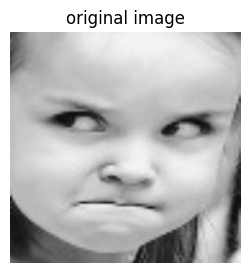

Predicted class is : sad 


In [231]:
plt.figure(figsize=(3,3))
plt.subplot(1,1,1)
plt.imshow(image)
plt.title('original image')
plt.axis('off')
plt.show()
print("Predicted class is : {} ".format(class_names[predicted_label]))